In [127]:
import time
import json
import urllib
import requests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [185]:
dfa = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/ffinalafreecatv.csv')
dfa

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,broad_rank,name,broad_share,index_num,week_num
0,0,0,0,1,LOL,34%,0,142
1,1,1,1,2,배틀그라운드,17.4%,1,142
2,2,2,2,3,스타,15.3%,2,142
3,3,3,3,4,서든어택,7.3%,3,142
4,4,4,4,5,피파온라인4,4.8%,4,142
...,...,...,...,...,...,...,...,...
4285,4285,4285,25,26,테일즈런너,0.2%,4285,0
4286,4286,4286,26,27,던파,0.2%,4286,0
4287,4287,4287,27,28,R2,0.1%,4287,0
4288,4288,4288,28,29,오버워치,0.1%,4288,0


In [234]:
dfpop_b = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/game_tree_graph/pretty_pc_graph.csv')
dfpop_b
# share = 183 - dfpop_b['Unnamed: 0']//20
# dfpop_b['week_num'] =share
i = dfpop_b[dfpop_b['week_num']>142].index
dfpop_p=dfpop_b.drop(i)
dfpop_p

,Unnamed: 0.1,Unnamed: 0,week_num,rank,column-1 2,name,company,type
860,860,860,142,1,(-),리그 오브 레전드,라이엇 게임즈,MOBA
861,861,861,142,2,(-),피파온라인4,㈜넥슨코리아,스포츠
862,862,862,142,3,(-),메이플스토리,㈜넥슨코리아,MMORPG
863,863,863,142,4,(-),배틀그라운드,펍지주식회사,서바이벌 슈팅
864,864,864,142,5,(-),로스트아크,㈜스마일게이트알피지,핵앤슬래시 MMORPG
...,...,...,...,...,...,...,...,...
3715,3715,3715,0,16,(-),마비노기,㈜넥슨코리아,MMORPG
3716,3716,3716,0,17,(+1),테일즈런너,㈜스마일게이트메가포트,레이싱
3717,3717,3717,0,18,(-1),오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
3718,3718,3718,0,19,(+1),바람의나라,㈜넥슨코리아,MMORPG


In [235]:
dfa_bg=dfa.loc[dfa['name']=='배틀그라운드']
dfpop_p_bg=dfpop_p.loc[dfpop_p['name']=='배틀그라운드']

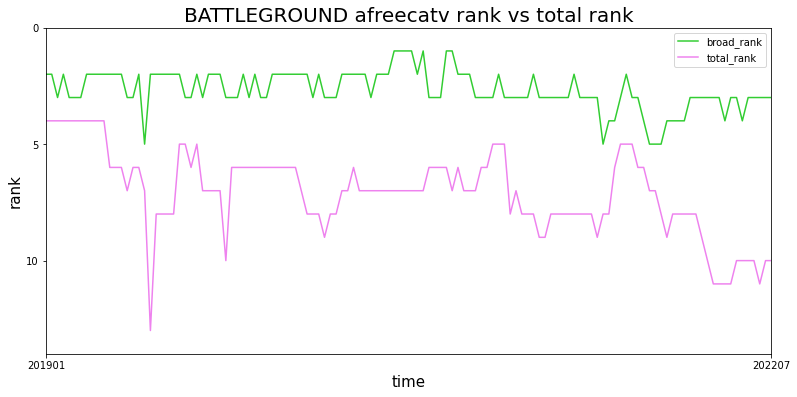

In [236]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
x1=dfa_bg['week_num']
y1=dfa_bg['broad_rank']
x2=dfpop_p_bg['week_num']
y2=dfpop_p_bg['rank']
plt.plot(x1,y1,color='limegreen', label='broad_rank') 
plt.plot(x2,y2,color='violet', label='total_rank' )
plt.title('BATTLEGROUND afreecatv rank vs total rank',size=20)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
plt.ylim(14,0)
plt.xlim(125,0)
ax.set_xticks([125,0],[201901,202207])
ax.set_yticks([10,5,0])

In [237]:
# 배그의 아프리카 tv 방송 순위와 pc 순위의 상관관계 검정
import scipy.stats as stats
corr_p=stats.pearsonr(dfa_bg['broad_rank'],dfpop_p_bg['rank'])
corr_p

(0.30477054588568764, 0.00021476470927509752)

In [ ]:
# 유의수준이 0.05일때, 상관관계 검정의 p값이 0.05보다 작으므로 가설을 기각합니다.
# 따라서 배그의 pc 순위와 아프리카tv 방송 점유율 순위는 상관이 있다고 할 수 있습니다.

In [228]:
# 배그의 모바일 사용자수
dfu = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/mobile_user/mobile_user_rank_30.csv')
dfu['week_num'] = 133 - dfu.index // 30
dfu

,rank,rank_change,app_name,publisher_name,biz_category_sub,value,week_num
0,1,NaN,브롤스타즈,Supercell,액션게임,-9.99,133
1,2,NaN,배틀그라운드,"KRAFTON, Inc.",슈팅게임,-2.12,133
2,3,NaN,클래시 로얄,Supercell,전략게임,-1.89,133
3,4,1.0,피망 뉴맞고: 고스톱 대표 맞고 게임,NEOWIZ corp,카지노게임,1.15,133
4,5,-1.0,무한의 계단,NFLY STUDIO,아케이드게임,-8.00,133
...,...,...,...,...,...,...,...
4015,26,2.0,프로젝트 세카이 컬러풀 스테이지! feat.하츠네 미쿠,Nuverse,리듬/타일게임,18.92,0
4016,27,-2.0,리그 오브 레전드: 와일드 리프트,"Riot Games, Inc",전략게임,-1.29,0
4017,28,-2.0,꿈의 정원 (Gardenscapes),Playrix,캐주얼게임,0.40,0
4018,29,10.0,메이플스토리M,NEXON Company,롤플레잉게임,29.12,0


In [227]:
# 배그의 전체 순위 간격 수정
i = dfpop_p[dfpop_p['week_num']>133].index
dfpop_p=dfpop_p.drop(i)
dfpop_p

,Unnamed: 0.1,Unnamed: 0,week_num,rank,column-1 2,name,company,type
1040,1040,1040,133,1,(-),리그 오브 레전드,라이엇 게임즈,MOBA
1041,1041,1041,133,2,(+1),메이플스토리,㈜넥슨코리아,MMORPG
1042,1042,1042,133,3,(-1),피파온라인4,㈜넥슨코리아,스포츠
1043,1043,1043,133,4,(+2),카트라이더,㈜넥슨코리아,레이싱
1044,1044,1044,133,5,(-1),로스트아크,㈜스마일게이트알피지,핵앤슬래시 MMORPG
...,...,...,...,...,...,...,...,...
3715,3715,3715,0,16,(-),마비노기,㈜넥슨코리아,MMORPG
3716,3716,3716,0,17,(+1),테일즈런너,㈜스마일게이트메가포트,레이싱
3717,3717,3717,0,18,(-1),오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
3718,3718,3718,0,19,(+1),바람의나라,㈜넥슨코리아,MMORPG


In [229]:
# 배그의 모바일 사용자수와 pc 순위의 상관관계 검정
dfu_bg=dfu.loc[dfu['app_name']=='배틀그라운드']
dfpop_p_bg=dfpop_p.loc[dfpop_p['name']=='배틀그라운드']
corr_p=stats.pearsonr(dfu_bg['rank'],dfpop_p_bg['rank'])
corr_p

(0.6588994897584821, 4.968724663571773e-18)

In [ ]:
# 유의수준이 0.05일때, 상관관계 검정의 p값이 0.05보다 작으므로 가설을 기각합니다.
# 따라서 배그의 pc 순위와 모바일 유저수는 상관이 있다고 할 수 있습니다.

In [192]:
# 메이플스토리의 pc 순위 vs 아프리카 tv 방송 순위
dfa_m=dfa.loc[dfa['name']=='메이플스토리']
dfpop_p_m=dfpop_p.loc[dfpop_p['name']=='메이플스토리']
corr_p=stats.pearsonr(dfa_m['broad_rank'],dfpop_p_m['rank'])
corr_p

(0.5433802086879526, 2.346571633790561e-12)

In [ ]:
# 유의수준이 0.05일때, 상관관계 검정의 p값이 0.05보다 작으므로 가설을 기각합니다.
# 따라서 메이플스토리의 pc 순위와 아프리카tv 방송 점유율 순위는 상관이 있다고 할 수 있습니다.

In [193]:
# 피파온라인4의 pc 순위 vs 아프리카 tv 방송 순위
dfa_f=dfa.loc[dfa['name']=='피파온라인4']
dfpop_p_f=dfpop_p.loc[dfpop_p['name']=='피파온라인4']
corr_p=stats.pearsonr(dfa_f['broad_rank'],dfpop_p_f['rank'])
corr_p

(0.15032408532295588, 0.07312737000726562)

In [ ]:
# 유의수준이 0.05일때, 상관관계 검정의 p값이 0.05보다 크므로 가설을 기각하지 못합니다.
# 따라서 피파온라인4의 pc 순위와 아프리카tv 방송 점유율 순위는 상관이 있다고 할 수 없습니다.